### Уровень 0
Придумайте матрицы, которые обладают следующими свойствами:
1. диагональная, ортогональная, но не единичная(!):
2. верхнетреугольная, ортогональная:
3. нижнетреугольная, ортогональная:
4. матрица, у которой определитель = 1, и все элементы не равны 0:
P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:
m = np.array([[2, 2],
[1, 3]])
print(m)

In [34]:
import numpy as np

In [35]:
# диагональная, ортогональная, но не единичная(!):  

a = np.array([[-1, 0], [0, 1]])
# проверка
at = a.transpose() # получим такую же как исходная
a.dot(at)

array([[1, 0],
       [0, 1]])

In [36]:
# верхнетреугольная, ортогональная: 

b = np.array([[-1, 0, 0], 
              [0, 1, 0],
              [0, 0, -1]
            ])

# проверка
bt = b.transpose()
b.dot(bt)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [37]:
# нижнетреугольная, ортогональная:  

c = np.array([[-1, 0, 0], 
              [0, 1, 0],
              [0, 0, -1]
            ])

# проверка
ct = c.transpose()
c.dot(ct)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [38]:
# матрица, у которой определитель = 1, и все элементы не равны 0:  

d = np.array([[2, 3], 
              [1, 2]])

# проверка
np.linalg.det(d)

1.0

In [40]:
# Найдите собственные значения и собственные вектора матриц: 

m = np.array([[2, 2], [1, 3]])

w,v = np.linalg.eig(m)

for i in range(len(m)):
    print('Собственное значение ' + str(w[i]))
    print('соответствующий ему собственный вектор' + str(v[:,i]))

Собственное значение 1.0
соответствующий ему собственный вектор[-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор[-0.70710678 -0.70710678]


### Уровень 1:
Найдите спектральное разложение матрицы:
m = np.array([[1, 2],
[2,3]])
print(m)

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. *

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA
В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - документация по PCA
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html  - документация по MSE
	
Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [41]:
# Спектральный анализ - это разложение матрицы на три : ортогональную S из собственных векторов и ее транспонированную,
#  диаганальную D из собственных значений
m = np.array([[1, 2], [2,3]])
print(m)

[[1 2]
 [2 3]]


In [42]:
w,v = np.linalg.eig(m) # вычислим собственные вектора и значения
print(f'Собственные значения: - {np.array(w)} ' )
print('Собственные вектора:')
print(v)

Собственные значения: - [-0.23606798  4.23606798] 
Собственные вектора:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [43]:
#  Создаем диаганальную матрицу
D = np.diag(w)
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [44]:
# создаем матрицу из собственных векторов ( у нас получилась симметричная)
S =v.T
S

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [45]:
# транспонированная форма S (будет совпадать)
S_t = S.T
S_t

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

In [46]:
# проверим их ортогональность. Должны получить еденичную матрицу
np.dot(S_t,S)

array([[1., 0.],
       [0., 1.]])

In [47]:
#   Проверим действительно ли полученные матрицы, являются спектральным разложение исходной матрицы 
np.dot(np.dot(S_t,D),S)

#  Мы получили исходную матрицу

array([[1., 2.],
       [2., 3.]])

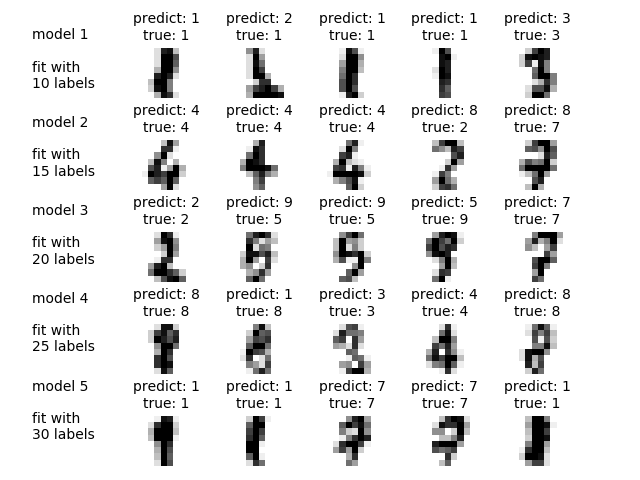

In [48]:
from PIL import Image
img = Image.open('image.png')
arr = np.array(img.getdata())
img

In [49]:
print(arr.size)
print(arr.size ** 0.5)

1228800
1108.5125168440816


In [50]:
x = np.resize(arr, (236, 236))
x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 160, 160, 255],
       [234, 234, 234, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [51]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

i = 1
res = []
while i <= 235:
    pca = PCA(n_components = i)
    reduced = pca.fit_transform(x)
    y = pca.inverse_transform(reduced)
    m = mse(x, y)
    res.append(m)
    i += 1

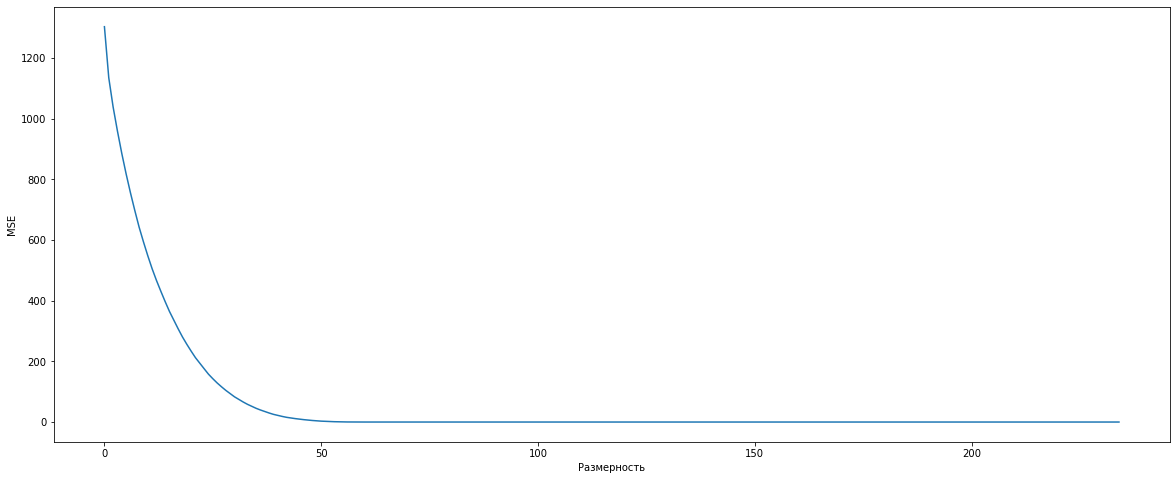

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
plt.plot(res)
plt.xlabel('Размерность')
plt.ylabel('MSE')
plt.show()